In [2]:
pip install meteostat

  Obtaining dependency information for meteostat from https://files.pythonhosted.org/packages/23/93/0d277de2b38238072b850e33fbd94e230951f2e5d7ac140ae221a05215b0/meteostat-1.6.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [5]:
start = datetime(2016, 10, 31)
end = datetime(2023, 10, 31)

In [7]:
location = Point(51.5072, 0.1276, 11)

In [8]:
data = Daily(location, start, end)
data = data.fetch()

In [9]:
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2016-10-31,12.8,10.0,17.0,NaN,NaN,NaN,6.6,NaN,NaN,NaN
2016-11-01,10.5,8.0,13.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN
2016-11-02,8.1,6.0,11.0,NaN,NaN,NaN,9.6,NaN,NaN,NaN
2016-11-03,7.8,4.0,11.0,NaN,NaN,NaN,9.9,NaN,NaN,NaN
2016-11-04,9.5,8.0,12.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN


In [10]:
data.tail()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-10-27,10.2,8.3,12.8,NaN,NaN,225.0,22.1,46.3,994.6,NaN
2023-10-28,9.7,7.9,12.4,NaN,NaN,208.0,19.8,42.6,999.1,NaN
2023-10-29,10.0,7.4,12.8,NaN,NaN,197.0,17.0,35.2,1003.8,NaN
2023-10-30,10.3,8.7,12.6,NaN,NaN,215.0,19.0,37.0,1006.9,NaN
2023-10-31,10.3,8.2,12.9,NaN,NaN,211.0,21.4,40.8,1010.2,NaN


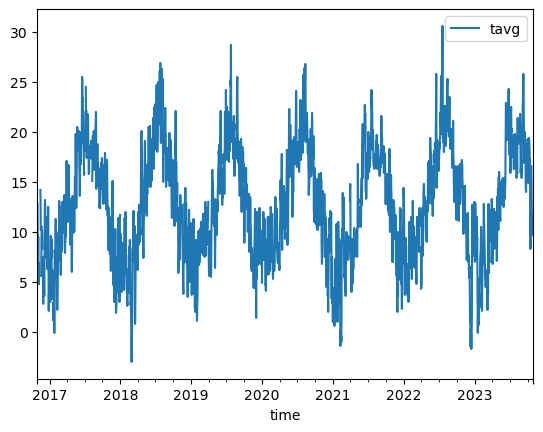

In [11]:
data.plot(y=['tavg'])
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2016-10-31 to 2023-10-31
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    2531 non-null   float64
 1   tmin    2531 non-null   float64
 2   tmax    2531 non-null   float64
 3   prcp    1023 non-null   float64
 4   snow    0 non-null      float64
 5   wdir    2323 non-null   float64
 6   wspd    2531 non-null   float64
 7   wpgt    1843 non-null   float64
 8   pres    2089 non-null   float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 219.7 KB


In [13]:
len(data['tavg'])

2557

In [14]:
data['number'] = np.arange((len(data['tavg'])))

In [15]:
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,number
time,,,,,,,,,,,
2016-10-31,12.8,10.0,17.0,NaN,NaN,NaN,6.6,NaN,NaN,NaN,0
2016-11-01,10.5,8.0,13.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,1
2016-11-02,8.1,6.0,11.0,NaN,NaN,NaN,9.6,NaN,NaN,NaN,2
2016-11-03,7.8,4.0,11.0,NaN,NaN,NaN,9.9,NaN,NaN,NaN,3
2016-11-04,9.5,8.0,12.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,4


In [16]:
data['tavg'].fillna(method='ffill', inplace=True)

In [17]:
x = np.array(data['number'])
y = np.array(data['tavg'])

In [18]:
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import norm,normaltest,probplot
from scipy import optimize
from matplotlib import style
from statistics import pstdev
import pylab 

In [23]:
def form(x,A,B,C,phi):
    return A + B * x + C * np.sin(np.radians(x - phi))

In [24]:
param, covariance = optimize.curve_fit(form, x, y, [0, 0, 0, 0])
fit_sin = form(x, *param)

In [27]:
param

array([ 1.26079905e+01,  6.71430245e-05, -6.58131084e+00,  1.18240353e+01])

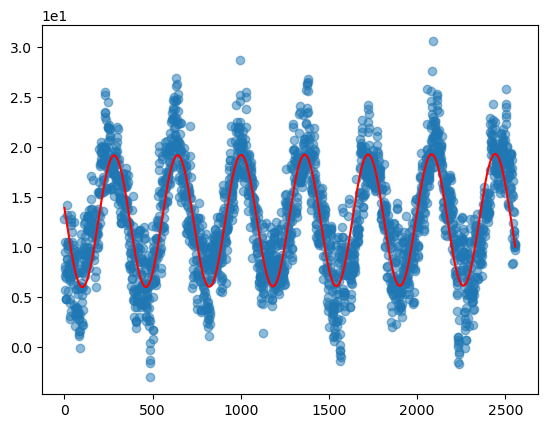

In [29]:
plt.scatter(x, y, label='data', alpha=0.5)
plt.plot(x, fit_sin, 'r-')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))  # Increase the spacing between ticks
plt.show()

In [30]:
projection_mean = y - fit_sin 

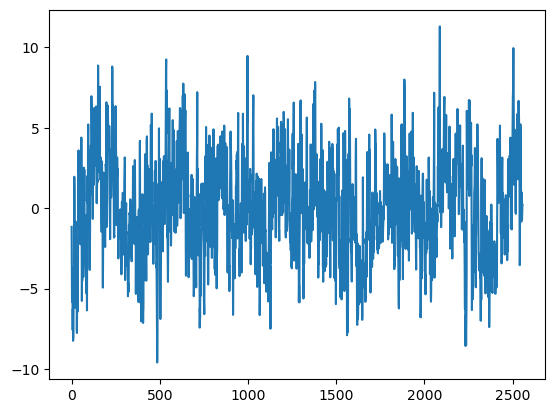

In [31]:
plt.plot(projection_mean)
plt.show()

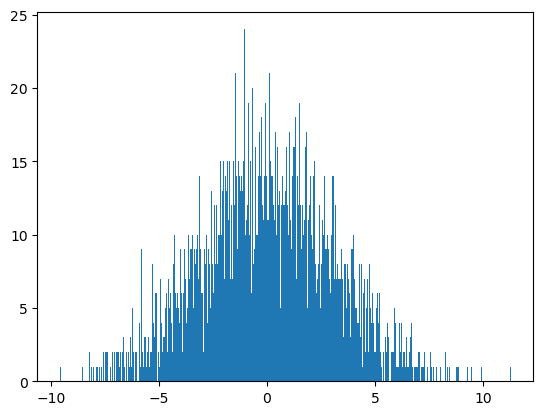

In [32]:
plt.hist(projection_mean, bins=500)
plt.show()

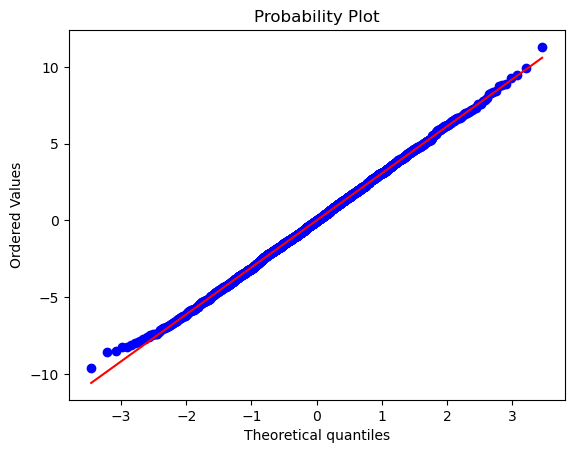

In [33]:
probplot(projection_mean, dist="norm", plot=pylab)
pylab.show()

b :  0.7989632009433061
a :  0.0005199079249939498
se :  33.05782586259691


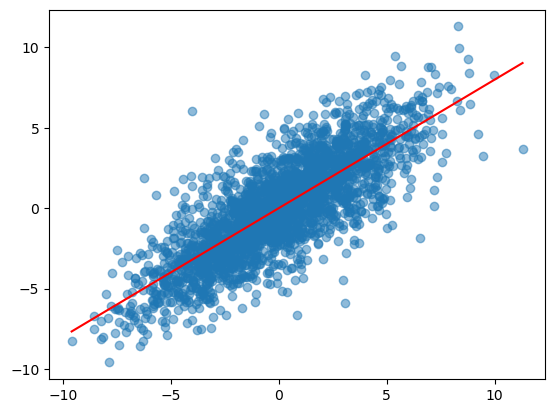

In [34]:
absc = projection_mean[:-1].reshape((-1, 1))
ordo = projection_mean[1:]
model = LinearRegression(fit_intercept=True)
model.fit(absc, ordo)
b = model.coef_[0]
a = model.intercept_
x_test=np.linspace(min(absc[:-1]),max(absc[:-1]),num=len(absc)).reshape((-1, 1))
y_pred = model.predict(x_test)

se = mean_squared_error(ordo, y_pred)
print("b : ",b)
print("a : ", a)
print("se : ", se)

plt.scatter(absc,ordo,alpha=0.5)
plt.plot(x_test,y_pred,c="red")
plt.show()